In [83]:
import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



In [84]:
#Data load
df_bank_fraud = pd.read_csv("Bank_transaction_fraud_detection.csv")

In [85]:
df_bank_fraud

,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
0,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,Osha Tella,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,4fa3208f-9e23-42dc-b330-844829d0c12c,23-01-2025,...,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0,INR,+9198579XXXXXX,Bitcoin transaction,oshaXXXXX@XXXXX.com
1,7c14ad51-781a-4db9-b7bd-67439c175262,Hredhaan Khosla,Female,51,Maharashtra,Nashik,Nashik Branch,Business,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,11/1/2025,...,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0,INR,+9191074XXXXXX,Grocery delivery,hredhaanXXXX@XXXXXX.com
2,3a73a0e5-d4da-45aa-85f3-528413900a35,Ekani Nazareth,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,e41c55f9-c016-4ff3-872b-cae72467c75c,25-01-2025,...,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,0,INR,+9197745XXXXXX,Mutual fund investment,ekaniXXX@XXXXXX.com
3,7902f4ef-9050-4a79-857d-9c2ea3181940,Yamini Ramachandran,Female,57,Tamil Nadu,Chennai,Chennai Branch,Business,7f7ee11b-ff2c-45a3-802a-49bc47c02ecb,19-01-2025,...,Entertainment,58177.08,POS Mobile App,"Chennai, Tamil Nadu",Mobile,0,INR,+9195889XXXXXX,Food delivery,yaminiXXXXX@XXXXXXX.com
4,3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9,Kritika Rege,Female,43,Punjab,Amritsar,Amritsar Branch,Savings,f8e6ac6f-81a1-4985-bf12-f60967d852ef,30-01-2025,...,Entertainment,16108.56,Virtual Card,"Amritsar, Punjab",Mobile,0,INR,+9195316XXXXXX,Debt repayment,kritikaXXXX@XXXXXX.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156342,f596668a-39e9-4f58-bc33-1c97f54ae343,Ansh Agrawal,Female,52,Arunachal Pradesh,Itanagar,Itanagar Branch,Savings,abaf2883-2ab2-4360-93ae-6eebb9a5ba37,17-01-2025,...,Health,48152.65,ATM Booth Kiosk,"Itanagar, Arunachal Pradesh",ATM,0,INR,+9199893XXXXXX,Moving services payment,anshXXXX@XXXXXXX.com
156343,07513777-8e89-4abc-b561-5ed3331a8f4a,Suhani Bhasin,Female,64,Delhi,South Delhi,South Delhi Branch,Business,e520daaa-2d08-4939-a9d5-df67512ad4a9,12/1/2025,...,Clothing,69956.08,POS Mobile App,"South Delhi, Delhi",Desktop,0,INR,+9191151XXXXXX,Bitcoin transaction,suhaniXXXX@XXXXX.com
156344,dfdd6356-5c6e-4eb6-b6a6-9365c9ee5399,Karan Dass,Female,34,Lakshadweep,Kavaratti,Kavaratti Branch,Checking,035ef4d9-f670-4c9c-954c-38e023661a13,7/1/2025,...,Entertainment,62197.09,Voice Assistant,"Kavaratti, Lakshadweep",Desktop,0,INR,+9199760XXXXXX,Medical treatment payment,karanXXXX@XXXXX.com
156345,953268d2-f0ec-41be-9b5e-5cd38032c0a4,Dev Sarma,Male,20,Puducherry,Mahe,Mahe Branch,Savings,7568fb14-76c3-46a8-9dfd-192ad6e29046,9/1/2025,...,Clothing,27862.23,POS Mobile App,"Mahe, Puducherry",Mobile,0,INR,+9195478XXXXXX,Gift card purchase,devXXXXX@XXXXX.com


In [86]:
#Total Number of records
df_bank_fraud.shape[0]

156347

In [90]:
## Count of records  with Is fraud
## Count shows  the dataset is imbalancced
df_bank_fraud["Is_Fraud"].value_counts()

0    148436
1      7911
Name: Is_Fraud, dtype: int64

In [91]:
#Percentage of Fraud Records
round((df_bank_fraud["Is_Fraud"].value_counts()[1] / df_bank_fraud.shape[0]) *100,2)

5.06

In [92]:
#only_fraud_df = df_bank_fraud[df_bank_fraud["Is_Fraud"] == 1] 'Bank_Branch' == 'Chandigarh Branch & "Transaction_Amount" >= 10,000.00)
                                                                               
filtered_and = df_bank_fraud[(df_bank_fraud['Bank_Branch'] == 'Chandigarh Branch') & (df_bank_fraud['Transaction_Amount'] >= 10000.00)  & (df_bank_fraud['Is_Fraud'] == 1)]
print("Branch = Chandigarh Branch AND  = 35:\n", filtered_and, '\n')

Branch = Chandigarh Branch AND  = 35:
                                  Customer_ID     Customer_Name  Gender  Age  \
323     5d5b46f4-09f0-4c22-a7e5-be73f673ce0c         Owen Gera  Female   68   
429     63a65d78-af01-4c7b-aea9-e6c125c00d59    Wriddhish Sood  Female   45   
793     5a04692a-6afa-4fdb-96ba-50159410b788      Panini Menon  Female   58   
1297    3ed708ee-3948-44c8-9fb8-0de80b943387      Vasatika Sem  Female   53   
1366    e99094fa-8ca0-4fa3-b4ee-792a33bad4f9      Arjun Bhalla  Female   30   
...                                      ...               ...     ...  ...   
154786  ecbf7dac-9f6c-43e9-87d2-a63be97b9dd6        Ijaya Bumb    Male   27   
155399  6508f255-43e4-4efd-a8b5-7f33af926c98     Samarth Kumar    Male   65   
155803  fd7f119d-b1ec-48ad-8439-db3e046b6a14     Krishna Khare  Female   26   
155833  a59e7069-6287-44b5-97bc-da40d1c400af      Yashica Kota    Male   34   
156310  c07d0f8b-853f-411d-a7f7-acf85f70f314  Yachana Bhandari  Female   41   

            

In [99]:
def check(dataset):
    bank_fraud= (dataset[(dataset["Is_Fraud"]== 1)])
    l=[]
    columns=bank_fraud.columns
    for col in columns:
        dtypes=bank_fraud[col].dtypes
        nunique=bank_fraud[col].nunique()
        sum_null=bank_fraud[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check 


In [100]:
check(bank_fraud_df)

,column,dtypes,nunique,sum_null
0,Customer_ID,object,7911,0
1,Customer_Name,object,7793,0
2,Gender,object,2,0
3,Age,int64,53,0
4,State,object,34,0
5,City,object,145,0
6,Bank_Branch,object,145,0
7,Account_Type,object,3,0
8,Transaction_ID,object,7911,0
9,Transaction_Date,object,30,0


In [101]:
df_bank_fraud.describe()

,Age,Transaction_Amount,Account_Balance,Is_Fraud
count,156347.000000,156347.000000,156347.000000,156347.000000
mean,43.988052,49552.305724,52475.705056,0.050599
std,15.283394,28522.440378,27394.950127,0.219178
min,18.000000,10.290000,5000.820000,0.000000
25%,31.000000,24925.240000,28769.380000,0.000000
50%,44.000000,49479.300000,52416.660000,0.000000
75%,57.000000,74248.945000,76207.515000,0.000000
max,70.000000,98999.980000,99999.950000,1.000000


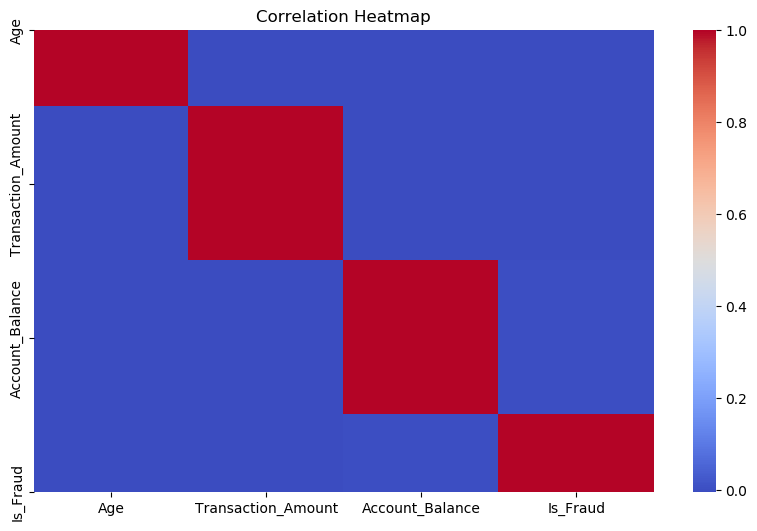

In [187]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_bank_fraud.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [102]:
df_bank_fraud.columns

Index(['Customer_ID', 'Customer_Name', 'Gender', 'Age', 'State', 'City',
       'Bank_Branch', 'Account_Type', 'Transaction_ID', 'Transaction_Date',
       'Transaction_Time', 'Transaction_Amount', 'Merchant_ID',
       'Transaction_Type', 'Merchant_Category', 'Account_Balance',
       'Transaction_Device', 'Transaction_Location', 'Device_Type', 'Is_Fraud',
       'Transaction_Currency', 'Customer_Contact', 'Transaction_Description',
       'Customer_Email'],
      dtype='object')

In [103]:
def quanQual(dataset):
        quan=[]
        qual=[]
        for columnName in dataset.columns:
            #print(columnName)
            if(dataset[columnName].dtype=='O'):
                #print("qual")
                qual.append(columnName)
            else:
                #print("quan")
                quan.append(columnName)
        return quan,qual

In [106]:
Quan,Qual =quanQual(df_bank_fraud)

In [50]:
def Univariate(Quan,dataset):
        descriptive=pd.DataFrame(index=["Mean", "Median", "Mode","Q1:25%", "Q2:50%", "Q3:75%", "Q4:100%","99%",
                                "IQR","1.5rule","Lesser","Greater","Min","Max","kurtosis","skew","Var","Std"],columns=Quan)
        for columnName in Quan:
            descriptive[columnName]["Mean"]=round(dataset[columnName].mean())
            descriptive[columnName]["Median"]=dataset[columnName].median()
            descriptive[columnName]["Mode"]=dataset[columnName].mode()[0]
            descriptive[columnName]["Q1:25%"]=dataset.describe()[columnName]["25%"]
            descriptive[columnName]["Q2:50%"]=dataset.describe()[columnName]["50%"]
            descriptive[columnName]["Q3:75%"]=dataset.describe()[columnName]["75%"]
            descriptive[columnName]["Q4:100%"]=dataset.describe()[columnName]["max"]
            #99% 
            descriptive[columnName]["99%"]= np.percentile(dataset[columnName],99)
            #IQR Calculation IQR = Q3 - Q1.
            descriptive[columnName]["IQR"]= descriptive[columnName]["Q3:75%"] - descriptive[columnName]["Q1:25%"] 
            #1.5 Rule to calculate the  Low and High outlier range
            descriptive[columnName]["1.5rule"]=1.5* descriptive[columnName]["IQR"]
            #Low Outlier Range Q1 - 1.5 × IQR
            descriptive[columnName]["Lesser"]= descriptive[columnName]["Q1:25%"] - descriptive[columnName]["1.5rule"]
            #High Outlier Range Q3 + 1.5 × IQR
            descriptive[columnName]["Greater"]=  descriptive[columnName]["Q3:75%"] + descriptive[columnName]["1.5rule"]
            #Derive the min and  max  column value  from the data set
            descriptive[columnName]["Min"]= dataset[columnName].min()
            descriptive[columnName]["Max"] =dataset[columnName].max()
            descriptive[columnName]["kurtosis"]=dataset[columnName].kurtosis()
            descriptive[columnName]["skew"]=dataset[columnName].skew()
            descriptive[columnName]["Var"]=dataset[columnName].var()
            descriptive[columnName]["Std"]=dataset[columnName].std()
        return descriptive   

In [51]:
Univariate(Quan,df_bank_fraud)

,Age,Transaction_Amount,Account_Balance,Is_Fraud
Mean,44,49552,52476,0
Median,44,49479.3,52416.7,0
Mode,32,19882,10338.4,0
Q1:25%,31,24925.2,28769.4,0
Q2:50%,44,49479.3,52416.7,0
Q3:75%,57,74248.9,76207.5,0
Q4:100%,70,99000,99999.9,1
99%,70,98015.3,99060.5,1
IQR,26,49323.7,47438.1,0
1.5rule,39,73985.6,71157.2,0


<Figure size 1400x600 with 0 Axes>

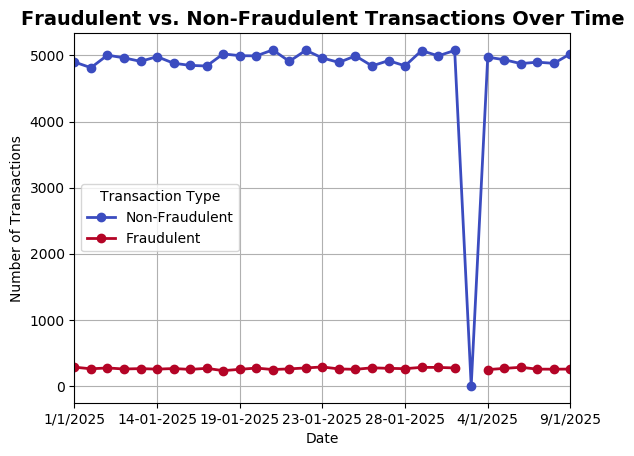

In [183]:
#Fraudulent vs. Non-Fraudulent Transactions Over Time (Time Series)
fraud_trend = df_bank_fraud.groupby(["Transaction_Date", "Is_Fraud"]).size().unstack()
plt.figure(figsize=(14, 6))
fraud_trend.plot(kind="line", marker="o", linewidth=2, colormap="coolwarm")
plt.title("Fraudulent vs. Non-Fraudulent Transactions Over Time", fontsize=14, fontweight='bold')
plt.xlabel("Date")
plt.ylabel("Number of Transactions")
plt.legend(["Non-Fraudulent", "Fraudulent"], title="Transaction Type")
plt.grid(True)
plt.show()

<Figure size 1400x600 with 0 Axes>

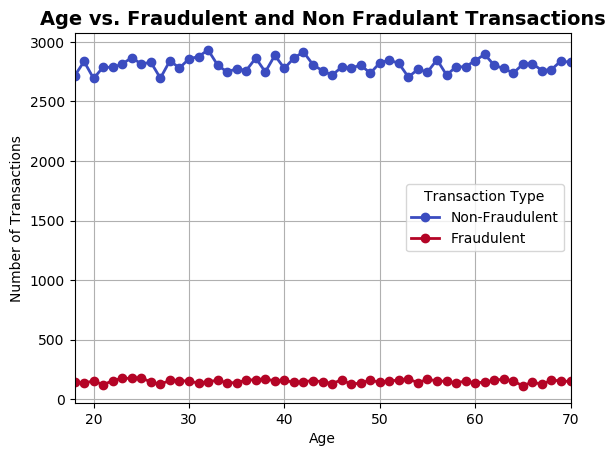

In [122]:
#Fraudulent vs. Non-Fraudulent Transactions by age
fraud_trend = df_bank_fraud.groupby(["Age", "Is_Fraud"]).size().unstack()
plt.figure(figsize=(14, 6))
fraud_trend.plot(kind="line", marker="o", linewidth=2, colormap="coolwarm")
plt.title("Age vs. Fraudulent and Non Fradulant Transactions", fontsize=14, fontweight='bold')
plt.xlabel("Age")
plt.ylabel("Number of Transactions")
plt.legend(["Non-Fraudulent", "Fraudulent"], title="Transaction Type")
plt.grid(True)
plt.show()

Here is the statistical info of Transaction Amount:
 count    156347.000000
mean      49552.305724
std       28522.440378
min          10.290000
25%       24925.240000
50%       49479.300000
75%       74248.945000
max       98999.980000
Name: Transaction_Amount, dtype: float64


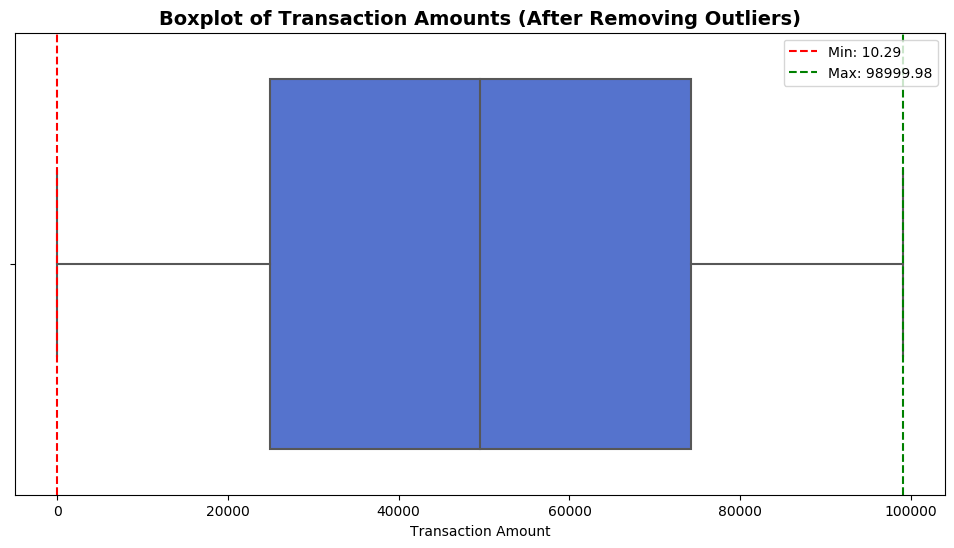

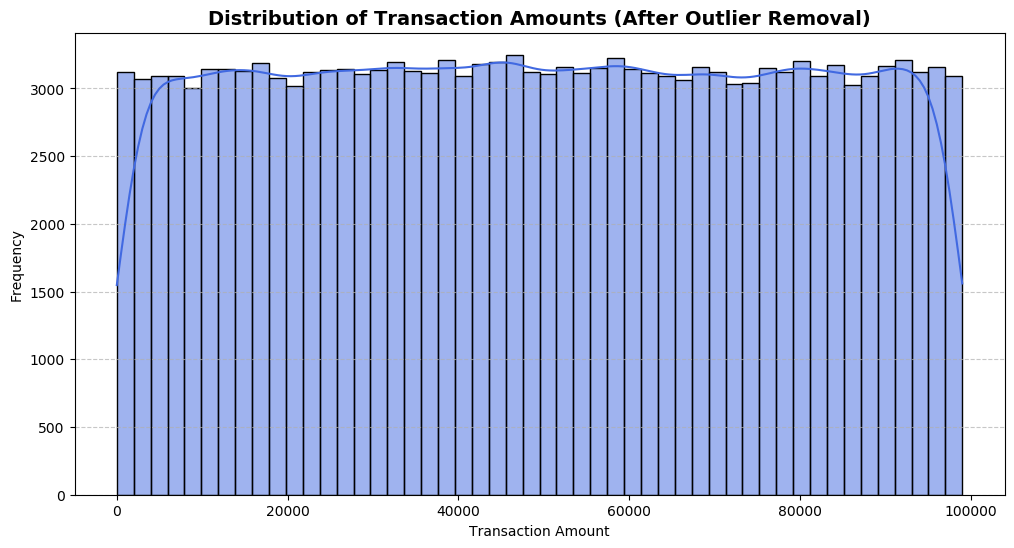

In [119]:
#handling outliers in the transaction data set using IQR
print('Here is the statistical info of Transaction Amount:\n',df_bank_fraud["Transaction_Amount"].describe())
Q1 = df_bank_fraud["Transaction_Amount"].quantile(0.25)
Q3 = df_bank_fraud["Transaction_Amount"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_clean = df_bank_fraud[(df_bank_fraud["Transaction_Amount"] >= lower_bound) & (df_bank_fraud["Transaction_Amount"] <= upper_bound)]


# The original min and max values in the transaction data column (to be used in ghe box plot)
original_min = df_bank_fraud["Transaction_Amount"].min()
original_max = df_bank_fraud["Transaction_Amount"].max()

plt.figure(figsize=(12, 6))
sns.boxplot(x=df_clean["Transaction_Amount"], color="royalblue")
plt.axvline(original_min, color="red", linestyle="--", label=f"Min: {original_min}")
plt.axvline(original_max, color="green", linestyle="--", label=f"Max: {original_max}")
plt.title("Boxplot of Transaction Amounts (After Removing Outliers)", fontsize=14, fontweight='bold')
plt.xlabel("Transaction Amount")
plt.legend()
plt.show()

#Plot the distribution after outlier removal
plt.figure(figsize=(12, 6))
sns.histplot(df_clean["Transaction_Amount"], bins=50, kde=True, color="royalblue")
plt.title("Distribution of Transaction Amounts (After Outlier Removal)", fontsize=14, fontweight='bold')
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

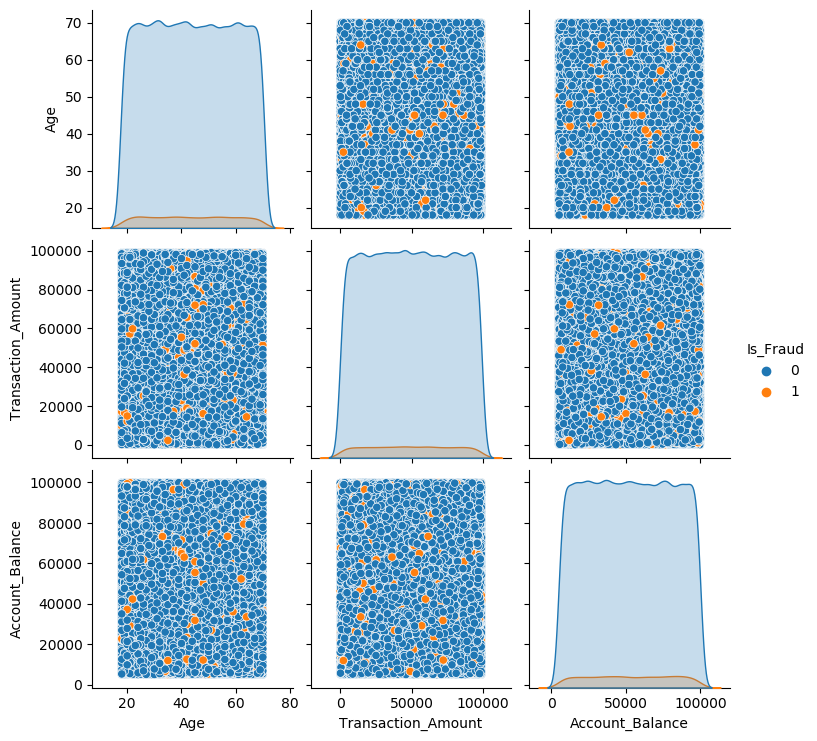

In [107]:
sns.pairplot(data=df_bank_fraud[['Age', 'Transaction_Amount', 'Account_Balance','Is_Fraud']],hue='Is_Fraud');

Here is the statistical info of fraud Transaction Amount:
 count     7911.000000
mean     49212.687960
std      28589.016778
min         10.410000
25%      24758.630000
50%      49027.410000
75%      73760.150000
max      98999.020000
Name: Transaction_Amount, dtype: float64


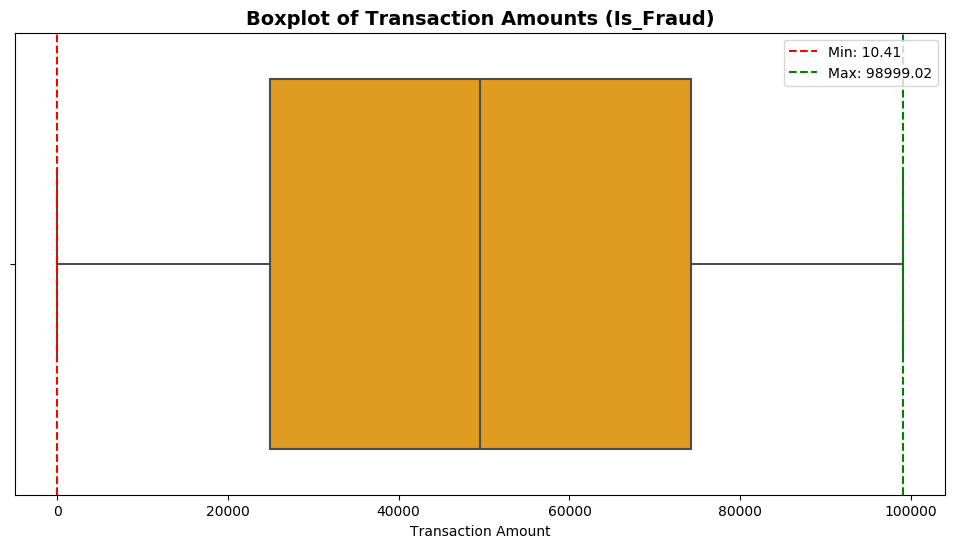

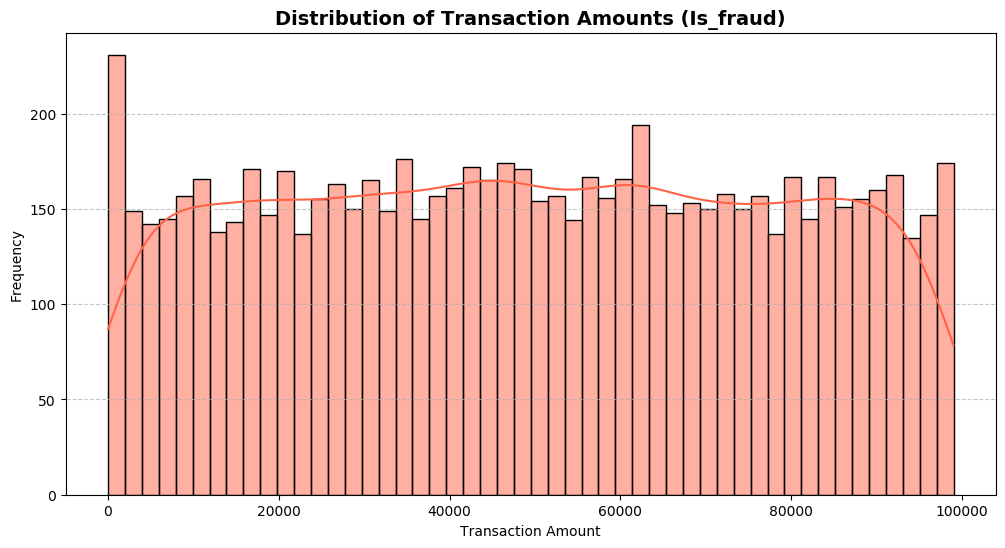

In [124]:
#handling outliers in the  fraud transaction data set using IQR
df_only_fraud = df_bank_fraud[(df_bank_fraud["Is_Fraud"] == 1)]
print('Here is the statistical info of fraud Transaction Amount:\n',df_only_fraud["Transaction_Amount"].describe())
Q1 = df_only_fraud["Transaction_Amount"].quantile(0.25)
Q3 = df_only_fraud["Transaction_Amount"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR



# The min and max values in the transaction data column (to be used in ghe box plot)
fraud_min = df_only_fraud["Transaction_Amount"].min()
fraud_max = df_only_fraud["Transaction_Amount"].max()

plt.figure(figsize=(12, 6))
sns.boxplot(x=df_clean["Transaction_Amount"], color="orange")
plt.axvline(fraud_min, color="red", linestyle="--", label=f"Min: {fraud_min}")
plt.axvline(fraud_max, color="green", linestyle="--", label=f"Max: {fraud_max}")
plt.title("Boxplot of Transaction Amounts (Is_Fraud)", fontsize=14, fontweight='bold')
plt.xlabel("Transaction Amount")
plt.legend()
plt.show()

#Plot the distribution after outlier removal
plt.figure(figsize=(12, 6))
sns.histplot(df_only_fraud["Transaction_Amount"], bins=50, kde=True, color="tomato")
plt.title("Distribution of Transaction Amounts (Is_fraud)", fontsize=14, fontweight='bold')
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

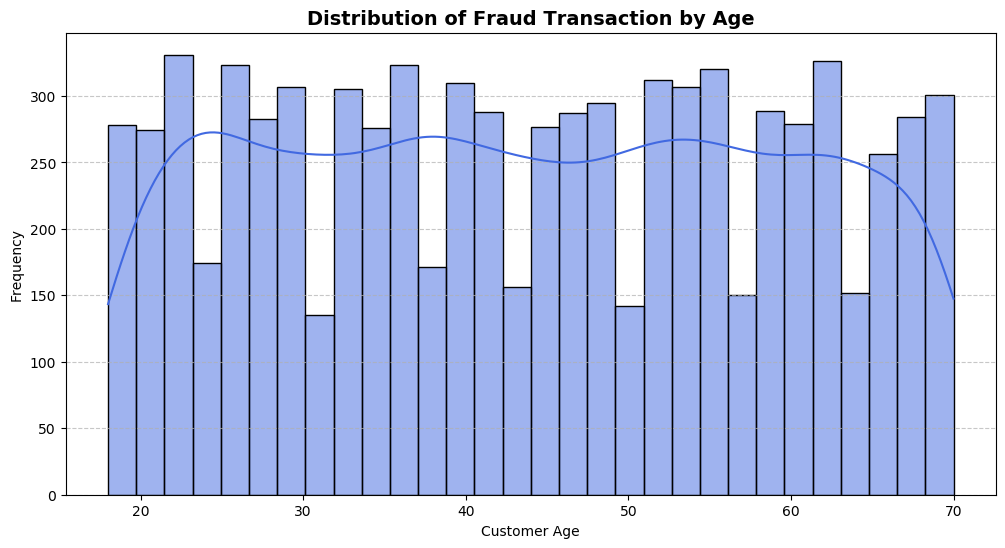

In [125]:
#1 Distribution of Fraud Transsaction by Age
plt.figure(figsize=(12, 6))
sns.histplot(df_only_fraud["Age"], bins=30, kde=True, color="royalblue")
plt.title("Distribution of Fraud Transaction by Age", fontsize=14, fontweight="bold")
plt.xlabel("Customer Age")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

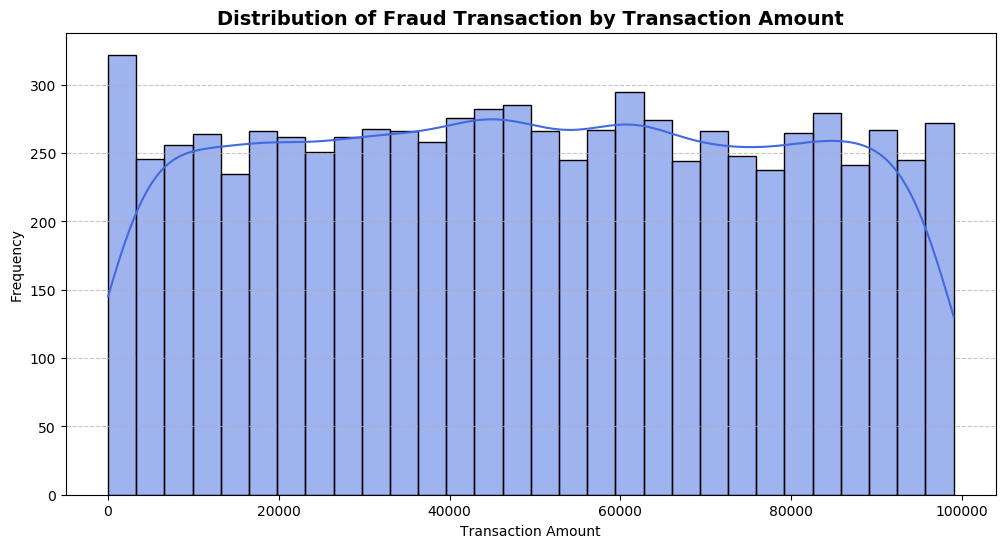

In [126]:
#Distribution of Fraud Transsaction by Transaction Amount
plt.figure(figsize=(12, 6))
sns.histplot(df_only_fraud["Transaction_Amount"], bins=30, kde=True, color="royalblue")
plt.title("Distribution of Fraud Transaction by Transaction Amount", fontsize=14, fontweight="bold")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

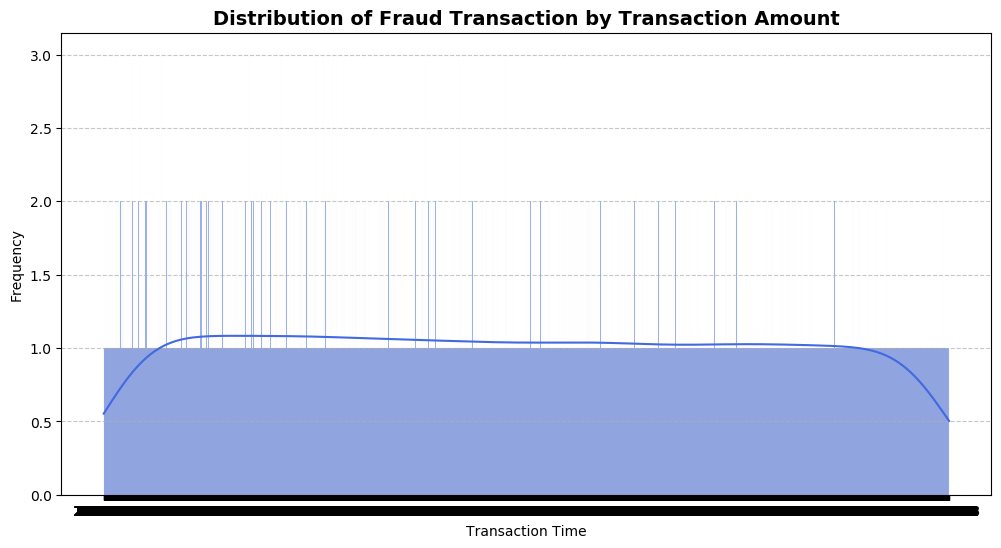

In [186]:
#Distribution of Fraud Transsaction by Transaction Amount
plt.figure(figsize=(12, 6))
sns.histplot(df_only_fraud["Transaction_Time"], bins=10, kde=True, color="royalblue")
plt.title("Distribution of Fraud Transaction by Transaction Amount", fontsize=14, fontweight="bold")
plt.xlabel("Transaction Time")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

<Figure size 1400x600 with 0 Axes>

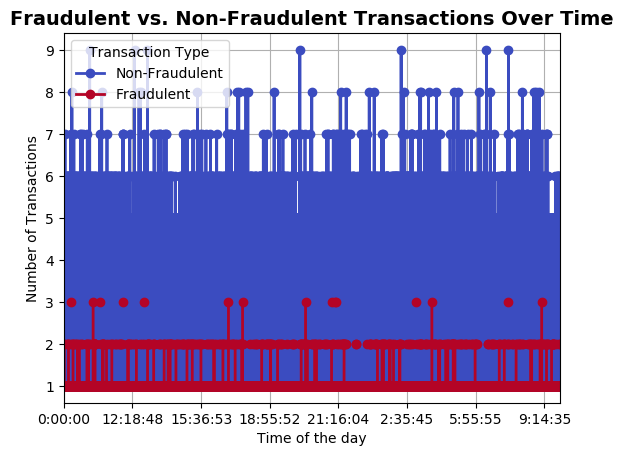

In [184]:
#Fraudulent vs. Non-Fraudulent Transactions Over Time (Time Series)
fraud_trend = df_bank_fraud.groupby(["Transaction_Time", "Is_Fraud"]).size().unstack()
plt.figure(figsize=(14, 6))
fraud_trend.plot(kind="line", marker="o", linewidth=2, colormap="coolwarm")
plt.title("Fraudulent vs. Non-Fraudulent Transactions Over Time", fontsize=14, fontweight='bold')
plt.xlabel("Time of the day")
plt.ylabel("Number of Transactions")
plt.legend(["Non-Fraudulent", "Fraudulent"], title="Transaction Type")
plt.grid(True)
plt.show()

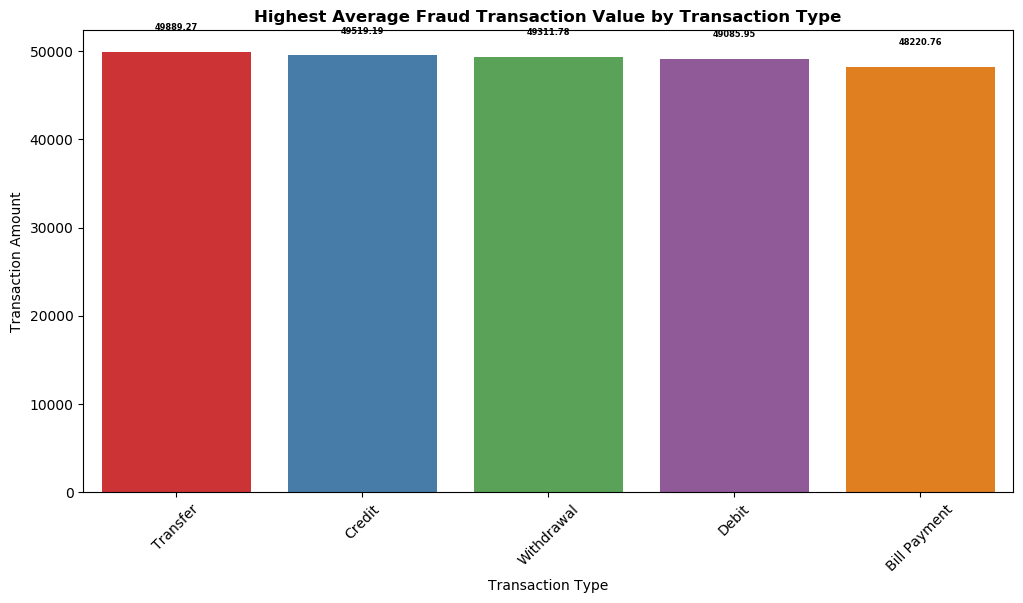

In [176]:
#Highest Fraud Average Transaction Value by Transaction Type
plt.figure(figsize=(12, 6))
high_value_by_location = df_only_fraud.groupby("Transaction_Type")["Transaction_Amount"].mean().sort_values(ascending=False)
                       
ax = sns.barplot(x=high_value_by_location.index, y=high_value_by_location.values, palette="Set1")
plt.title("Highest Average Fraud Transaction Value by Transaction Type", fontsize=12, fontweight='bold')
plt.xlabel("Transaction Type")
plt.ylabel("Transaction Amount")
plt.xticks(rotation=45)
for i, value in enumerate(high_value_by_location.values):
    ax.text(i, value + (0.05 * max(high_value_by_location.values)), f"{value:.2f}", ha="center", fontsize=6, fontweight='bold')
plt.show()

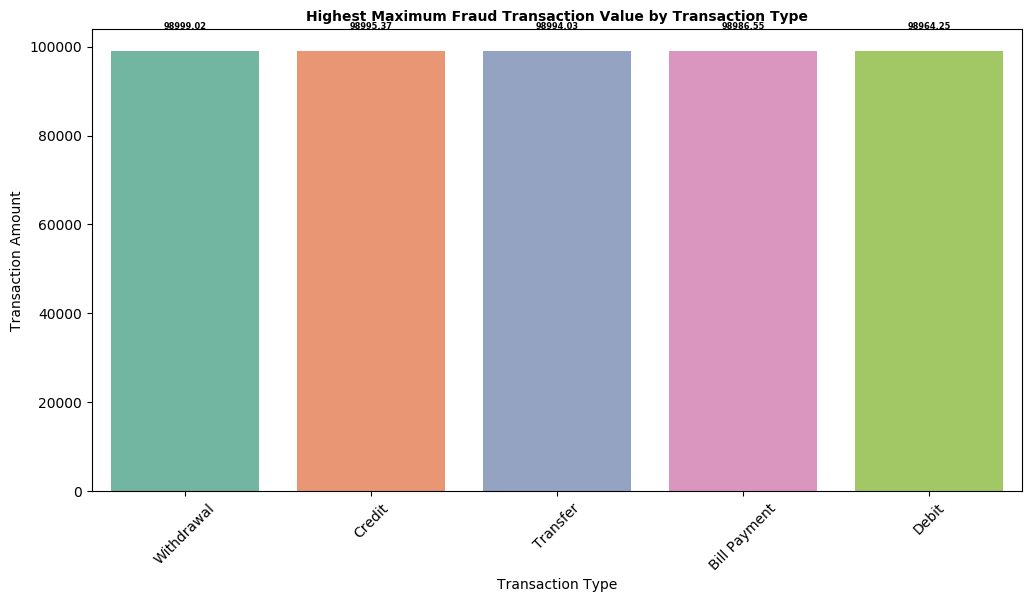

In [178]:
#Highest Fraud Maximum Transaction Value by Transaction Type
plt.figure(figsize=(12, 6))
high_value_by_location = df_only_fraud.groupby("Transaction_Type")["Transaction_Amount"].max().sort_values(ascending=False)
                       
ax = sns.barplot(x=high_value_by_location.index, y=high_value_by_location.values, palette="Set2")
plt.title("Highest Maximum Fraud Transaction Value by Transaction Type", fontsize=10, fontweight='bold')
plt.xlabel("Transaction Type")
plt.ylabel("Transaction Amount")
plt.xticks(rotation=45)
for i, value in enumerate(high_value_by_location.values):
    ax.text(i, value + (0.05 * max(high_value_by_location.values)), f"{value:.2f}", ha="center", fontsize=6, fontweight='bold')
plt.show()

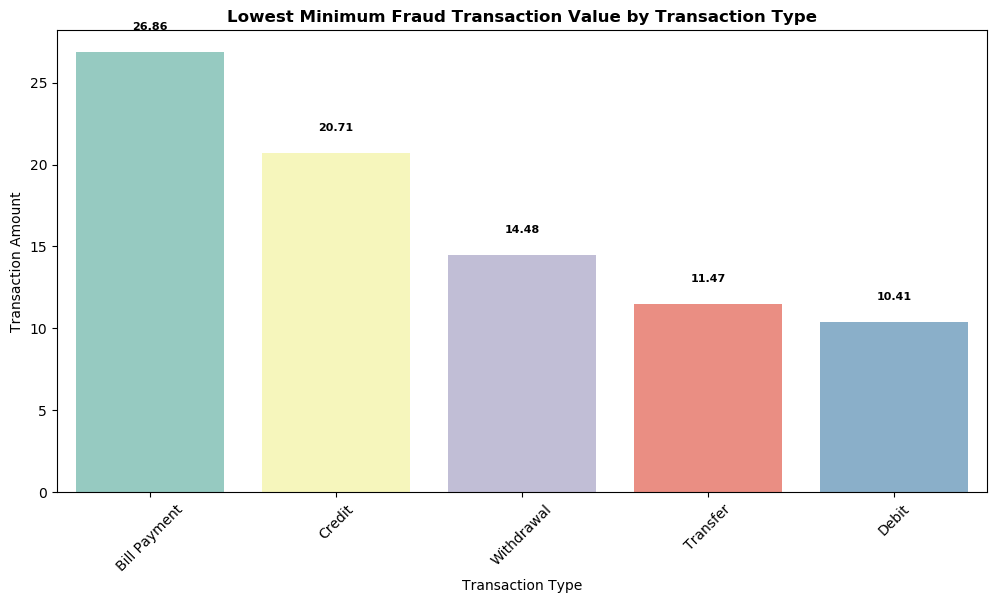

In [180]:
#Highest Fraud Minimum Transaction Value by Transaction Type
plt.figure(figsize=(12, 6))
high_value_by_location = df_only_fraud.groupby("Transaction_Type")["Transaction_Amount"].min().sort_values(ascending=False)
                       
ax = sns.barplot(x=high_value_by_location.index, y=high_value_by_location.values, palette="Set3")
plt.title("Lowest Minimum Fraud Transaction Value by Transaction Type", fontsize=12, fontweight='bold')
plt.xlabel("Transaction Type")
plt.ylabel("Transaction Amount")
plt.xticks(rotation=45)
for i, value in enumerate(high_value_by_location.values):
    ax.text(i, value + (0.05 * max(high_value_by_location.values)), f"{value:.2f}", ha="center", fontsize=8, fontweight='bold')
plt.show()

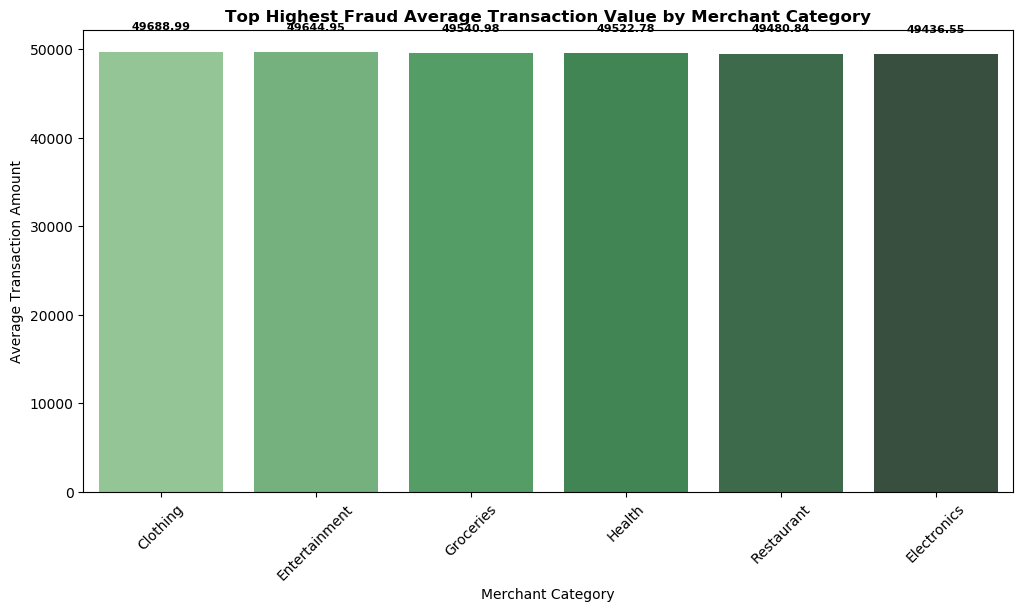

In [153]:
#Top Merchant Category with the highest value of  Fraud transactions
plt.figure(figsize=(12, 6))
high_value_by_location = df_clean.groupby("Merchant_Category")["Transaction_Amount"].mean().sort_values(ascending=False)
ax = sns.barplot(x=high_value_by_location.index, y=high_value_by_location.values, palette="Greens_d")
plt.title("Top Highest Fraud Average Transaction Value by Merchant Category", fontsize=12, fontweight='bold')
plt.xlabel("Merchant Category")
plt.ylabel("Average Transaction Amount")
plt.xticks(rotation=45)
for i, value in enumerate(high_value_by_location.values):
    ax.text(i, value + (0.05 * max(high_value_by_location.values)), f"{value:.2f}", ha="center", fontsize=8, fontweight='bold')
plt.show()

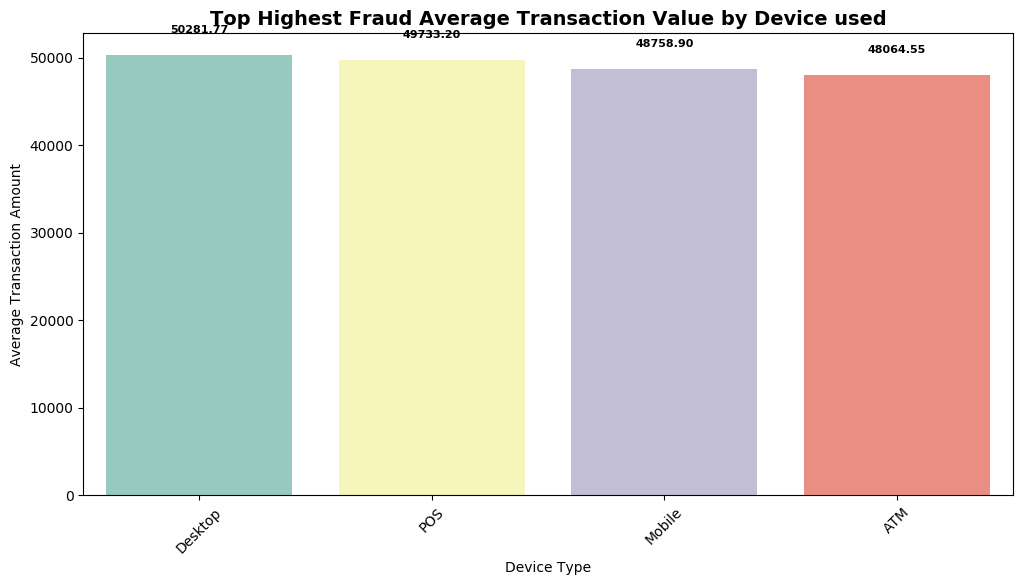

In [156]:
#Top Device Type with the highest value of  Fraud transactions
plt.figure(figsize=(12, 6))
high_value_by_location = df_only_fraud.groupby("Device_Type")["Transaction_Amount"].mean().sort_values(ascending=False)
ax = sns.barplot(x=high_value_by_location.index, y=high_value_by_location.values, palette= 'Set3')
plt.title("Top Highest Fraud Average Transaction Value by Device used", fontsize=14, fontweight='bold')
plt.xlabel("Device Type")
plt.ylabel("Average Transaction Amount")
plt.xticks(rotation=45)
for i, value in enumerate(high_value_by_location.values):
    ax.text(i, value + (0.05 * max(high_value_by_location.values)), f"{value:.2f}", ha="center", fontsize=8, fontweight='bold')
plt.show()

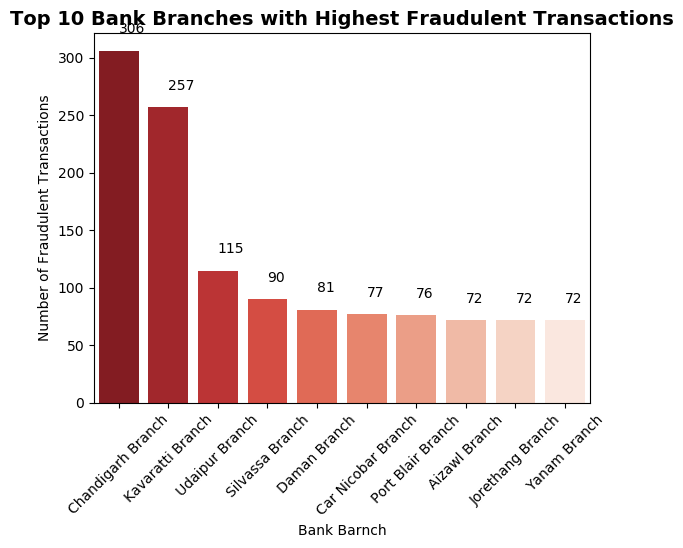

In [159]:
#Top 10 Bank Branches with the highest value of  Fraud transactions
fraud_by_location = df_bank_fraud[df_bank_fraud["Is_Fraud"] == 1]["Bank_Branch"].value_counts().head(10)
ax = sns.barplot(x=fraud_by_location.index, y=fraud_by_location.values, palette="Reds_r")
plt.title("Top 10 Bank Branches with Highest Fraudulent Transactions", fontsize=14, fontweight='bold')
plt.xlabel("Bank Barnch")
plt.ylabel("Number of Fraudulent Transactions")
plt.xticks(rotation=45)
for i, value in enumerate(fraud_by_location.values):
    ax.text(i,value+(0.05 * max(fraud_by_location.values)), str(value))
plt.show()


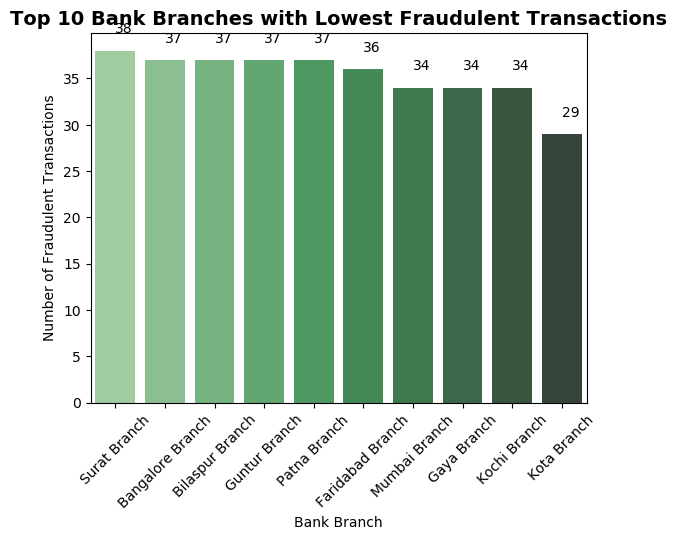

In [158]:
#Top 10 Bank Branches with the lowest value of  Fraud transactions
fraud_by_location = df_bank_fraud[df_bank_fraud["Is_Fraud"] == 1]["Bank_Branch"].value_counts().tail(10)
ax = sns.barplot(x=fraud_by_location.index, y=fraud_by_location.values, palette="Greens_d")
plt.title("Top 10 Bank Branches with Lowest Fraudulent Transactions", fontsize=14, fontweight='bold')
plt.xlabel("Bank Branch")
plt.ylabel("Number of Fraudulent Transactions")
plt.xticks(rotation=45)
for i, value in enumerate(fraud_by_location.values):
    ax.text(i,value+(0.05 * max(fraud_by_location.values)), str(value))
plt.show()
